In [55]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [56]:
data = pd.read_csv('https://raw.githubusercontent.com/andhikaw789/Customer-Personality-Analysis/main/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [57]:
data = data.drop(['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [58]:
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [59]:
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [60]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [61]:
data.dtypes

Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Recency                int64
Wines                  int64
Fruits                 int64
Meat                   int64
Fish                   int64
Sweets                 int64
Gold                   int64
NumDealsPurchases      int64
Web                    int64
Catalog                int64
Store                  int64
NumWebVisitsMonth      int64
dtype: object

In [62]:
data.isna().sum()

Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweets                0
Gold                  0
NumDealsPurchases     0
Web                   0
Catalog               0
Store                 0
NumWebVisitsMonth     0
dtype: int64

In [63]:
data.dropna(inplace=True)

In [64]:
data.nunique()

Education               5
Marital_Status          8
Income               1974
Kidhome                 3
Teenhome                3
Recency               100
Wines                 776
Fruits                158
Meat                  554
Fish                  182
Sweets                176
Gold                  212
NumDealsPurchases      15
Web                    15
Catalog                14
Store                  14
NumWebVisitsMonth      16
dtype: int64

In [65]:
print("Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Education:\n", data["Education"].value_counts(), "\n")

Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



In [66]:
# Build a list of categorical variables
objs = (data.dtypes == 'object')
object_cols = list(objs[objs].index)

print("Categorical variables: ", object_cols)

# Label encode object dtypes
from sklearn.preprocessing import LabelEncoder
LabEnc = LabelEncoder()
for obj in object_cols:
    data[obj] = data[[obj]].apply(LabEnc.fit_transform)

Categorical variables:  ['Education', 'Marital_Status']


In [67]:
data= data.drop(['Marital_Status','Kidhome','Teenhome',	'Recency'	,'Fruits','Meat','Fish',	'Sweets',	'Gold','NumDealsPurchases',	'Web',	'Catalog',	'Store',	'NumWebVisitsMonth'], axis=1)

In [68]:
data.head()

,Education,Income,Wines
0,2,58138.0,635
1,2,46344.0,11
2,2,71613.0,426
3,2,26646.0,11
4,4,58293.0,173


In [69]:
#K-Means model with two clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [70]:
#K-Means model parameters study
kmeans.cluster_centers_

array([[2.28621598e+00, 3.46079930e+04, 7.94925373e+01],
       [2.00000000e+00, 6.66666000e+05, 9.00000000e+00],
       [2.50836431e+00, 7.03482704e+04, 5.44174721e+02]])

In [71]:
y=kmeans.labels_
print(y)

[2 0 2 ... 2 2 2]


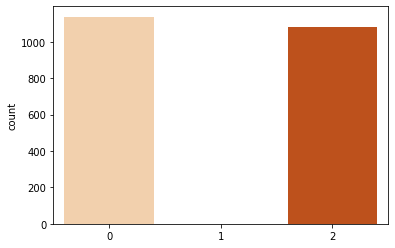

In [72]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

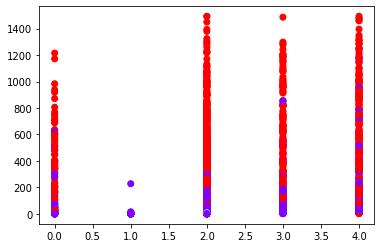

In [73]:
plt.scatter(data.iloc[:,0].values,data.iloc[:,2].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

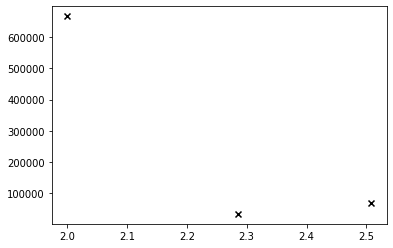

In [74]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

In [75]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Education,Income,Wines
0,0.000034,0.999940,0.010922
1,0.000043,1.000000,0.000237
2,0.000028,0.999982,0.005949
3,0.000075,1.000000,0.000413
4,0.000069,0.999996,0.002968


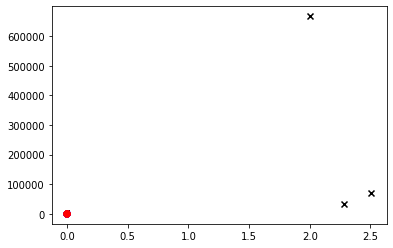

In [76]:
plt.scatter(data_scaled.iloc[:,0].values,data_scaled.iloc[:,2].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

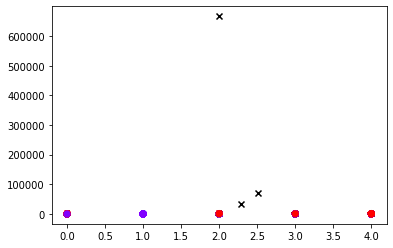

In [77]:
plt.scatter(data.iloc[:,0].values,data.iloc[:,2].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

In [78]:
kmeans.inertia_

319284953304.9755